In [1]:
pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


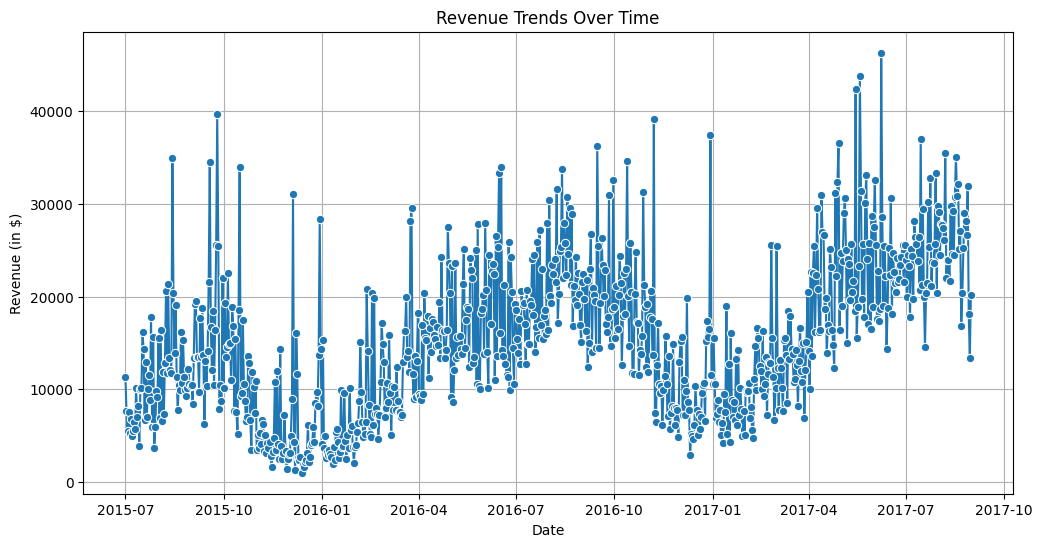

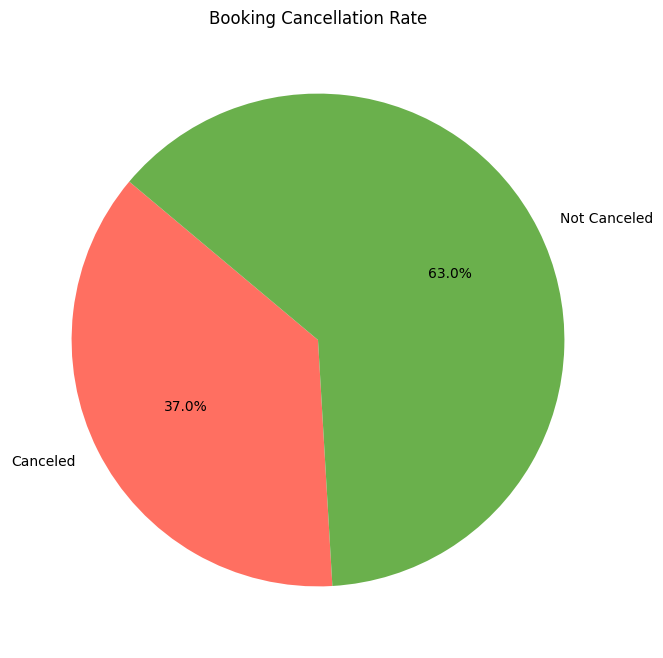

C:\Users\nandh\AppData\Local\Temp\ipykernel_8132\3821403893.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')


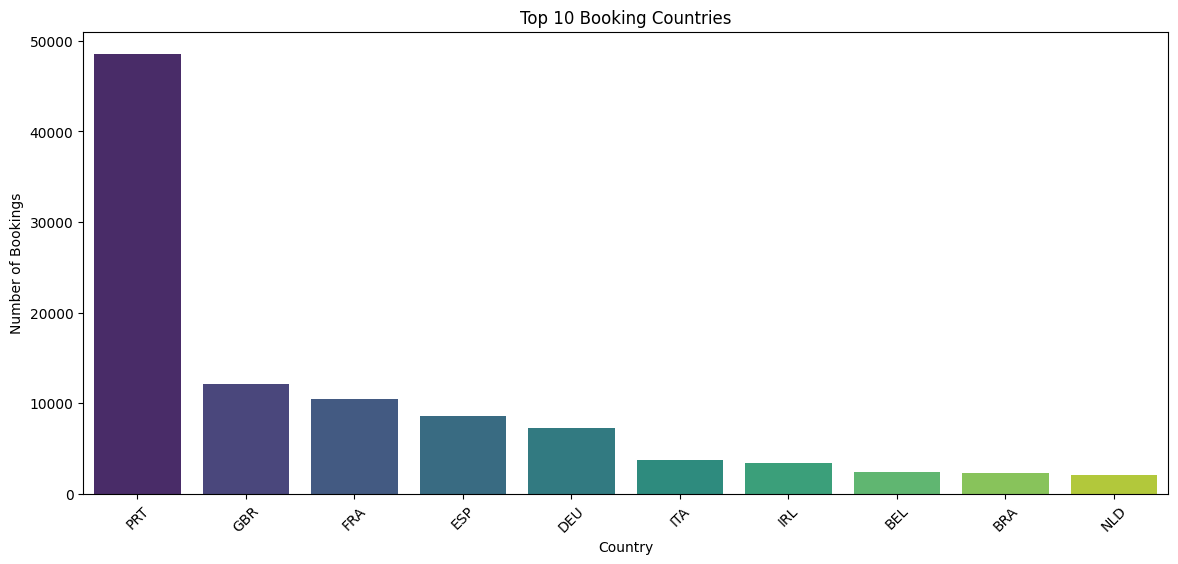

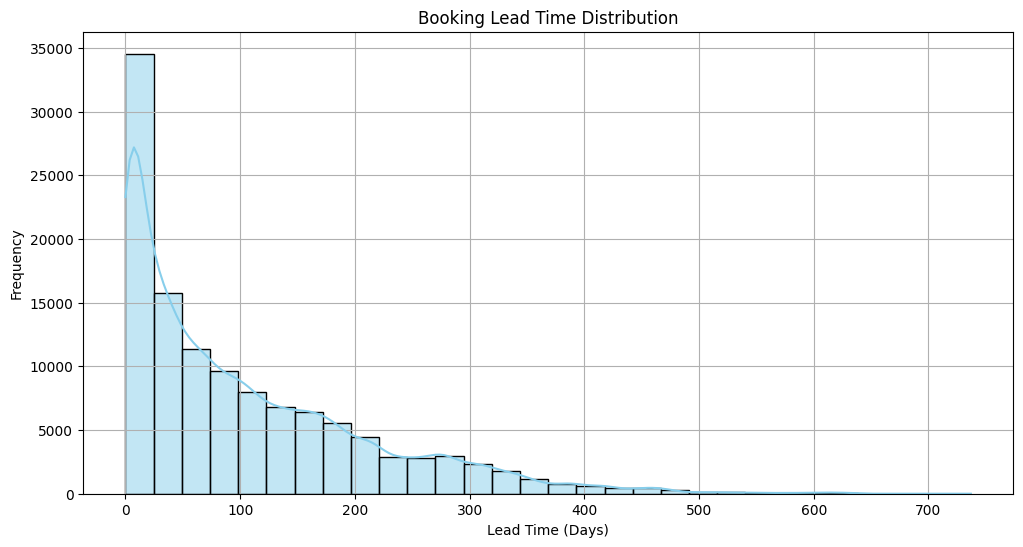

Analytics completed successfully!


In [3]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\\Users\\nandh\\OneDrive\\Documents\\hotel_bookings.csv"  # Update the path if needed
df = pd.read_csv(file_path)

df.fillna(0, inplace=True)

df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                                   df['arrival_date_month'] + '-' +
                                   df['arrival_date_day_of_month'].astype(str))

df['lead_time'] = pd.to_numeric(df['lead_time'], errors='coerce')

def plot_revenue_trends(df):
    revenue = df.groupby('arrival_date')['adr'].sum().reset_index()
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=revenue, x='arrival_date', y='adr', marker='o')
    plt.title('Revenue Trends Over Time')
    plt.xlabel('Date')
    plt.ylabel('Revenue (in $)')
    plt.grid(True)
    plt.show()

def plot_cancellation_rate(df):
    cancellation_rate = (df['is_canceled'].sum() / len(df)) * 100
    labels = ['Canceled', 'Not Canceled']
    sizes = [cancellation_rate, 100 - cancellation_rate]
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff6f61', '#6ab04c'])
    plt.title('Booking Cancellation Rate')
    plt.show()

def plot_geographical_distribution(df):
    location_counts = df['country'].value_counts().head(10)
    plt.figure(figsize=(14, 6))
    sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')
    plt.title('Top 10 Booking Countries')
    plt.xlabel('Country')
    plt.ylabel('Number of Bookings')
    plt.xticks(rotation=45)
    plt.show()

def plot_lead_time_distribution(df):
    plt.figure(figsize=(12, 6))
    sns.histplot(df['lead_time'], bins=30, kde=True, color='skyblue')
    plt.title('Booking Lead Time Distribution')
    plt.xlabel('Lead Time (Days)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


plot_revenue_trends(df)
plot_cancellation_rate(df)
plot_geographical_distribution(df)
plot_lead_time_distribution(df)

print("Analytics completed successfully!")
